# FAE


**What is the best neighborhood in Pittsburgh?**

    I chose the approach of safeness. I took a dataset that talked about crime within each neighborhood and it gave the type of crime committed. I took this information to try and find the safetest neighborhoood in pittsburgh. I came up with this metric because when I was trying to decide where to live offcampus, my biggest concern was safety.  


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
neighborhoods = pd.read_csv("Arrests.csv")
neighborhoods.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


**The Database I am working with provides information regarding arrests in the city of Pittsburgh. It provides information about the suspect, the arrest time and location, the offence, the location, and the neighborhood it took place in.**

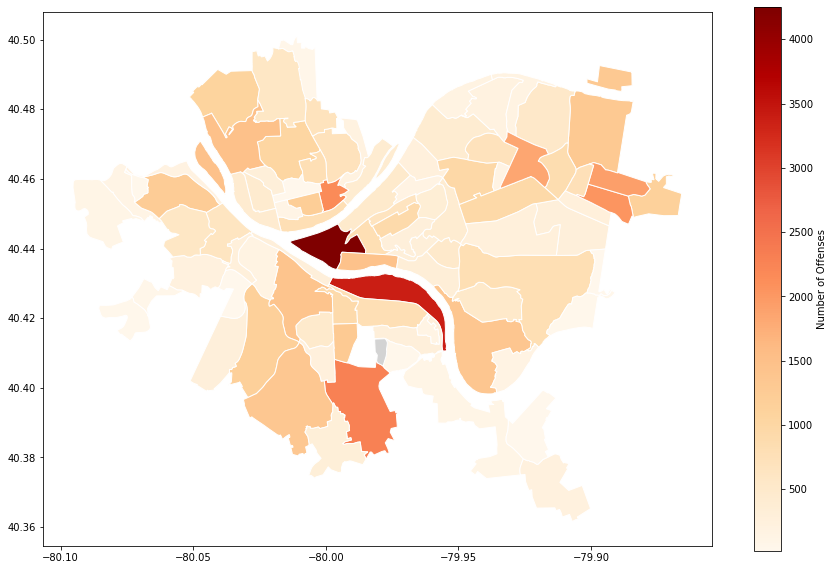

In [4]:
map = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

neighborhood_counts = neighborhoods['INCIDENTNEIGHBORHOOD'].value_counts()

# Merge the counts back into the 'map' GeoDataFrame
map_with_counts = map.merge(neighborhood_counts, how='left', left_on='hood', right_index=True)

# Rename the merged column for clarity
map_with_counts = map_with_counts.rename(columns={'INCIDENTNEIGHBORHOOD': 'incident_count'})

# Plot the choropleth map using the count column
map_with_counts.plot(column='incident_count',  # use the count column for coloring
                    cmap='OrRd',                # choose a color palette
                    edgecolor="white",          # outline the districts in white
                    legend=True,                # show the legend
                    legend_kwds={'label': "Number of Offenses"}, # label the legend
                    figsize=(15, 10),           # set the size
                    missing_kwds={"color": "lightgrey"} # set districts with no data to gray
                    )


**Overall map of pittsburgh that displays all the neighborhoods and the darker a neighborhood is, the more offenses it has**

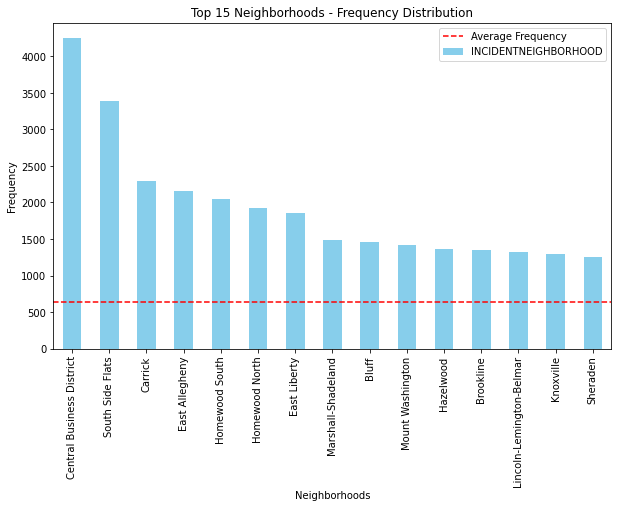

Average Crime for All Neighorhoods: 637.9795918367347


In [5]:
names_column = neighborhoods['INCIDENTNEIGHBORHOOD']

name_counts = names_column.value_counts()

top_n = 15  

top_names = name_counts.head(top_n)

average_frequency_all = name_counts.mean()

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.axhline(y=average_frequency_all, color='red', linestyle='--', label='Average Frequency')
plt.title(f'Top {top_n} Neighborhoods - Frequency Distribution')
plt.xlabel('Neighborhoods')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Average Crime for All Neighorhoods:", average_frequency_all)


**This graph shows the top 15 neighborhoods that show on the dataset the most. The dotted line shows the average amount of times a neighborhood is shown overall.**

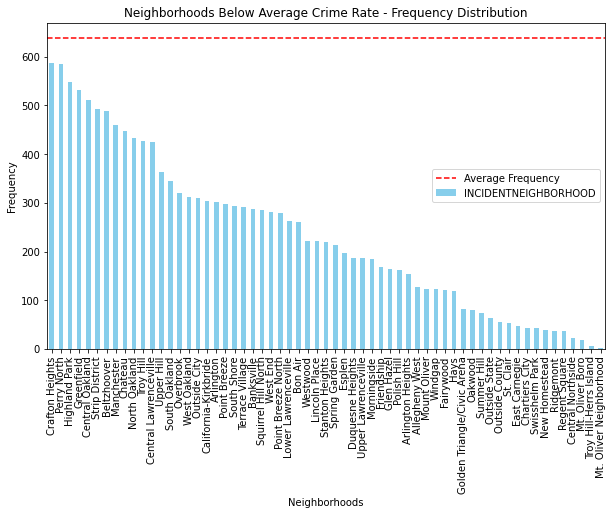

Average Crime for All Neighborhoods: 637.9795918367347


In [6]:
names_column = neighborhoods['INCIDENTNEIGHBORHOOD']

name_counts = names_column.value_counts()

average_frequency_all = name_counts.mean()

below_average_names = name_counts[name_counts < average_frequency_all]

plt.figure(figsize=(10, 6))
below_average_names.plot(kind='bar', color='skyblue')
plt.axhline(y=average_frequency_all, color='red', linestyle='--', label='Average Frequency')
plt.title(f'Neighborhoods Below Average Crime Rate - Frequency Distribution')
plt.xlabel('Neighborhoods')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Average Crime for All Neighborhoods:", average_frequency_all)


**This graph shows all the neighborhoods that are below that average line, the neighborhoods that have below-average crime frequency.**

**Below is simply a list of all those neighborhoods as it may be difficult to read on the graph.It is a total of 61 neighorhoods.**

In [7]:
names_below_average = below_average_names.index.tolist()
count_below_average = len(names_below_average)

print("Neighorhoods Below Average:", count_below_average)

for name in names_below_average:
    print(name)


Neighorhoods Below Average: 61
Crafton Heights
Perry North
Highland Park
Greenfield
Central Oakland
Strip District
Beltzhoover
Manchester
Chateau
North Oakland
Troy Hill
Central Lawrenceville
Upper Hill
South Oakland
Overbrook
West Oakland
Outside City
California-Kirkbride
Arlington
Point Breeze
South Shore
Terrace Village
Banksville
Squirrel Hill North
West End
Point Breeze North
Lower Lawrenceville
Bon Air
Westwood
Lincoln Place
Stanton Heights
Spring Garden
Esplen
Duquesne Heights
Upper Lawrenceville
Morningside
Friendship
Glen Hazel
Polish Hill
Arlington Heights
Allegheny West
Mount Oliver
Windgap
Fairywood
Hays
Golden Triangle/Civic Arena
Oakwood
Summer Hill
Outside State
Outside County
St. Clair
East Carnegie
Chartiers City
Swisshelm Park
New Homestead
Ridgemont
Regent Square
Central Northside
Mt. Oliver Boro
Troy Hill-Herrs Island
Mt. Oliver Neighborhood


In [8]:

crime_counts = neighborhoods.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='count')

neighborhood_totals = crime_counts.groupby('INCIDENTNEIGHBORHOOD')['count'].sum().reset_index(name='total_count')

top_neighborhoods = neighborhood_totals.nlargest(15, 'total_count')

top_crimes = crime_counts[crime_counts['INCIDENTNEIGHBORHOOD'].isin(top_neighborhoods['INCIDENTNEIGHBORHOOD'])]

most_common_crimes = top_crimes.loc[top_crimes.groupby('INCIDENTNEIGHBORHOOD')['count'].idxmax()]

most_common_crimes_sorted = most_common_crimes.sort_values(by='count', ascending=False)

neighborhood_crimes_list = most_common_crimes_sorted[['INCIDENTNEIGHBORHOOD', 'OFFENSES']].to_dict('records')

print(f"{'Rank':<5}{'Neighborhood':<30}{'Most Common Crime'}")
print("-" * 70)
rank = 1
for item in neighborhood_crimes_list:
    print(f'{rank:<5}{item["INCIDENTNEIGHBORHOOD"]:<30}{item["OFFENSES"]}')
    rank += 1


Rank Neighborhood                  Most Common Crime
----------------------------------------------------------------------
1    Central Business District     9015 Failure To Appear/Arrest on Attachment Order
2    East Liberty                  3929 Retail Theft.
3    Carrick                       2701 Simple Assault.
4    East Allegheny                9015 Failure To Appear/Arrest on Attachment Order
5    South Side Flats              9015 Failure To Appear/Arrest on Attachment Order
6    Brookline                     2701 Simple Assault.
7    Homewood South                9015 Failure To Appear/Arrest on Attachment Order
8    Mount Washington              2701 Simple Assault.
9    Bluff                         9015 Failure To Appear/Arrest on Attachment Order
10   Sheraden                      2701 Simple Assault.
11   Homewood North                2701 Simple Assault.
12   Marshall-Shadeland            2701 Simple Assault.
13   Knoxville                     2701 Simple Assault.
14   

**This is the list of the top 15 neighborhoods with the most overall-crime, and it includes what the most common crime is.**


In [9]:
neighborhood_totals = crime_counts.groupby('INCIDENTNEIGHBORHOOD')['count'].sum().reset_index(name='total_count')

bottom_neighborhoods = neighborhood_totals.nsmallest(61, 'total_count')

bottom_crimes = crime_counts[crime_counts['INCIDENTNEIGHBORHOOD'].isin(bottom_neighborhoods['INCIDENTNEIGHBORHOOD'])]

most_common_crimes = bottom_crimes.loc[bottom_crimes.groupby('INCIDENTNEIGHBORHOOD')['count'].idxmax()]

most_common_crimes_sorted = most_common_crimes.sort_values(by='count', ascending=False)

neighborhood_crimes_list = most_common_crimes_sorted[['INCIDENTNEIGHBORHOOD', 'OFFENSES']].to_dict('records')

print(f"{'Rank':<5}{'Neighborhood':<30}{'Most Common Crime'}")
print("-" * 60)
rank = 1
for item in neighborhood_crimes_list:
    print(f'{rank:<5}{item["INCIDENTNEIGHBORHOOD"]:<30}{item["OFFENSES"]}')
    rank += 1


Rank Neighborhood                  Most Common Crime
------------------------------------------------------------
1    Crafton Heights               2701 Simple Assault.
2    North Oakland                 9501 Bench Warrant
3    Perry North                   2701 Simple Assault.
4    Arlington                     2701 Simple Assault.
5    California-Kirkbride          9501 Bench Warrant
6    Central Lawrenceville         2701 Simple Assault.
7    Upper Hill                    2701 Simple Assault.
8    Beltzhoover                   2701 Simple Assault.
9    Greenfield                    2701 Simple Assault.
10   Highland Park                 9501 Bench Warrant
11   Manchester                    2701 Simple Assault.
12   Troy Hill                     2701 Simple Assault.
13   Overbrook                     2701 Simple Assault.
14   Chateau                       9501 Bench Warrant
15   Terrace Village               2701 Simple Assault.
16   Central Oakland               3929 Retail Theft.


**This is the list of the bottom 61 neighborhoods that were below the average threshold, and it includes what the most common crime is.**


In [10]:
assault_crimes = crime_counts[crime_counts['OFFENSES'].str.contains('assault', case=False, na=False)]

assault_totals = assault_crimes.groupby('INCIDENTNEIGHBORHOOD')['count'].sum().reset_index(name='assault_total_count')

sorted_neighborhoods = assault_totals.sort_values(by='assault_total_count', ascending=False)

neighborhood_assault_list = sorted_neighborhoods[['INCIDENTNEIGHBORHOOD', 'assault_total_count']].to_dict('records')

print(f"{'Rank':<5}{'Neighborhood':<30}{'Assault Total Count'}")
print("-" * 60)
rank = 1
for item in neighborhood_assault_list:
    print(f'{rank:<5}{item["INCIDENTNEIGHBORHOOD"]:<30}{item["assault_total_count"]}')
    rank += 1


Rank Neighborhood                  Assault Total Count
------------------------------------------------------------
1    Central Business District     846
2    South Side Flats              815
3    Carrick                       764
4    Marshall-Shadeland            572
5    Homewood North                527
6    Sheraden                      484
7    Brookline                     476
8    East Hills                    472
9    Knoxville                     459
10   Mount Washington              458
11   Homewood South                447
12   Beechview                     444
13   Hazelwood                     415
14   East Liberty                  407
15   Brighton Heights              370
16   Perry South                   334
17   Lincoln-Lemington-Belmar      308
18   Bedford Dwellings             300
19   Spring Hill-City View         287
20   Allentown                     285
21   Northview Heights             280
22   Middle Hill                   263
23   Homewood West        

**This shows all the neighborhoods with crime relating to assault and how many times a crime relating to assault has happened.**

I believe the best neighborhood in pittsburgh to be Mt. Oliver Neighborhood. It has the least amount of crime according to this dataset. My personal favorite neighborhood is of course Central Oakland, and while Central Oakland isn't terrible crime-wise, it isnt the best. It appeared a about 500 times, and Mt. Oliver Neighborhood appears about 5 times. 
    

# Shizhen

        Community  Rates  Rank
0        Downtown  $4.00     1
1     North Shore  $3.00     2
2         Oakland  $2.93     3
3          Uptown  $1.50     4
4   Strip Distri*  $1.50     5
5   Squirell Hill  $1.50     6
6    East Liberty  $1.50     7
7       ShadySide  $1.50     8
8       NorthSide  $1.00     9
9      South Side  $1.00    10
10      Allentown  $1.00    11
11      Beechview  $1.00    12
12  Mt. Washingt*  $1.00    13
13  Lawrenceville  $1.00    14
14        Carrick  $1.00    15
15      Brookline  $1.00    16
16     Bloomfield  $1.00    17
17       West End  $1.00    18


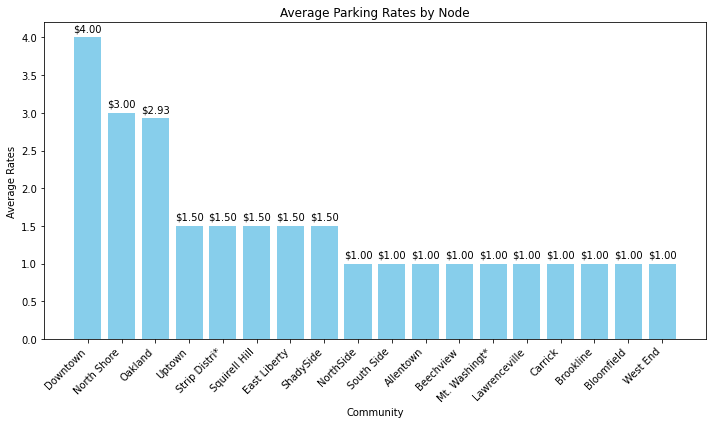

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Clean and convert the 'rates' column to numeric
df['rates'] = df['rates'].replace('[\$,]', '', regex=True).astype(float)

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and calculate the average rates for each node
average_rates = df.groupby('node')['rates'].mean().reset_index()

# Sort the DataFrame by average rates in descending order
average_rates = average_rates.sort_values(by='rates', ascending=False)

# Add a 'rank' column based on the sorted order
average_rates['Rank'] = range(1, len(average_rates) + 1)

# Reset the index based on the sorted order
average_rates.reset_index(drop=True, inplace=True)

# Plot a bar graph
plt.figure(figsize=(10, 6))

# Add annotations with units on top of each bar
for i, rate in enumerate(average_rates['rates']):
    plt.text(i, rate + 0.05, f'${rate:.2f}', ha='center', va='bottom')

plt.bar(average_rates['node'], average_rates['rates'], color='skyblue')
plt.xlabel('Community')
plt.ylabel('Average Rates')
plt.title('Average Parking Rates by Node')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Rename the 'node' column to 'Community' before displaying
average_rates = average_rates.rename(columns={'node': 'Community'})

# Make the first letter uppercase
average_rates = average_rates.rename(columns={'rates': 'Rates'})

# Add unit to the 'Rates' column in the DataFrame
average_rates['Rates'] = average_rates['Rates'].apply(lambda x: f'${x:.2f}')

# Display the DataFrame with average rates and ranks
print(average_rates)

# Show the bar graph
plt.show()

             node     rates  rank_rates  distance_to_pitt  rank_distance
0         Oakland  2.929398           3          0.778902              1
1          Uptown  1.500000           4          2.006623              2
2      South Side  1.000000          10          2.243542              3
3      Bloomfield  1.000000          17          2.260131              4
4   Strip Distri*  1.500000           5          2.372830              5
5       ShadySide  1.500000           8          2.562978              6
6   Lawrenceville  1.000000          14          3.044971              7
7        Downtown  4.000000           1          3.392836              8
8   Squirell Hill  1.500000           6          3.393320              9
9    East Liberty  1.500000           7          3.517112             10
10      Allentown  1.000000          11          3.721475             11
11    North Shore  3.000000           2          4.082141             12
12      NorthSide  1.000000           9          4.

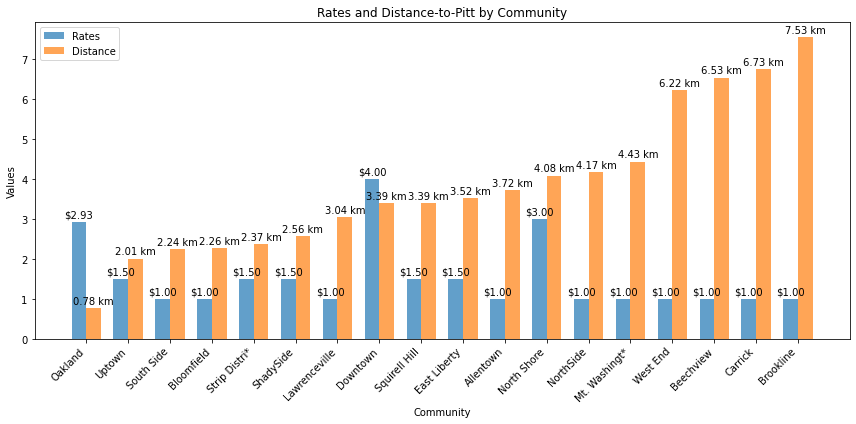

In [3]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Function to calculate Haversine distance between two sets of coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Clean and convert the 'rates' column to numeric
df['rates'] = df['rates'].replace('[\$,]', '', regex=True).astype(float)

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and calculate the average rates for each node
average_rates = df.groupby('node')['rates'].mean().reset_index()

# Sort the DataFrame by average rates in descending order
average_rates = average_rates.sort_values(by='rates', ascending=False)

# Add a 'rank_rates' column based on the sorted order of rates
average_rates['rank_rates'] = range(1, len(average_rates) + 1)

# University of Pittsburgh coordinates
pitt_lat, pitt_lon = 40.4440, -79.9605

# Calculate the distance from each node to the University of Pittsburgh
df['distance_to_pitt'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], pitt_lat, pitt_lon), axis=1)

# Group by 'node' and calculate the average distance for each node
average_distance = df.groupby('node')['distance_to_pitt'].mean().reset_index()

# Sort the DataFrame by average distance in ascending order
average_distance = average_distance.sort_values(by='distance_to_pitt')

# Add a 'rank_distance' column based on the sorted order of distance
average_distance['rank_distance'] = range(1, len(average_distance) + 1)

# Merge the two DataFrames on 'node'
merged_df = pd.merge(average_rates, average_distance, on='node')

# Sort the merged DataFrame by the rank of distance
merged_df = merged_df.sort_values(by='rank_distance')

# Format the 'rates' column with units
merged_df['rates'] = merged_df['rates']

# Reset the index based on the sorted order
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame with ranks of rates and distances
print(merged_df)

# Create a bar graph with annotations
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(merged_df))

bar1 = ax.bar(index, merged_df['rates'], bar_width, label='Rates', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], merged_df['distance_to_pitt'], bar_width, label='Distance', alpha=0.7)

ax.set_xlabel('Community')
ax.set_ylabel('Values')
ax.set_title('Rates and Distance-to-Pitt by Community')

# Rotate x-axis labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(merged_df['node'], rotation=45, ha='right')

# Annotate bars with values
for i, rate in enumerate(merged_df['rates']):
    ax.text(i, rate + 0.05, f'${rate:.2f}', ha='center', va='bottom')

for i, distance in enumerate(merged_df['distance_to_pitt']):
    ax.text(i + bar_width, distance + 0.05, f'{distance:.2f} km', ha='center', va='bottom')

ax.legend()

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

        Community  Spots-Count  Parking-Spots-Rank
0         Oakland          216                   1
1      South Side          109                   2
2        Downtown          104                   3
3       NorthSide           84                   4
4   Squirell Hill           69                   5
5       ShadySide           66                   6
6      Bloomfield           61                   7
7          Uptown           60                   8
8    East Liberty           59                   9
9   Strip Distri*           50                  10
10    North Shore           24                  11
11      Brookline           22                  12
12  Lawrenceville           15                  13
13  Mt. Washingt*           10                  14
14        Carrick            2                  15
15      Allentown            1                  16
16      Beechview            1                  17
17       West End            1                  18


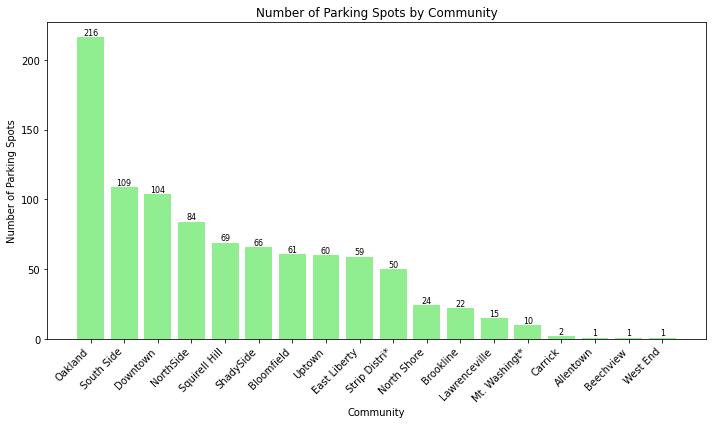

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and count the number of entries for each node
parking_spot_counts = df.groupby('node').size().reset_index(name='Spots-Count')

# Sort the DataFrame by parking spot counts in descending order
parking_spot_counts = parking_spot_counts.sort_values(by='Spots-Count', ascending=False)

# Add a 'rank_parking_spots' column based on the sorted order of parking spot counts
parking_spot_counts['Parking-Spots-Rank'] = range(1, len(parking_spot_counts) + 1)

# Reset the index based on the sorted order
parking_spot_counts.reset_index(drop=True, inplace=True)

# Rename the 'node' column to 'Community' before displaying
parking_spot_counts = parking_spot_counts.rename(columns={'node': 'Community'})

# Display the DataFrame with parking spot counts and ranks
print(parking_spot_counts)

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(parking_spot_counts['Community'], parking_spot_counts['Spots-Count'], color='lightgreen')
plt.xlabel('Community')
plt.ylabel('Number of Parking Spots')
plt.title('Number of Parking Spots by Community')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Label the digits on top of each bar
for i, count in enumerate(parking_spot_counts['Spots-Count']):
    plt.text(i, count + 0.05, f'{count}', ha='center', va='bottom', fontsize=8)

# Show the bar graph
plt.show()

Based on the metrics and rankings:

**Oakland:** It has the lowest average parking rates, the closest proximity to the University of Pittsburgh, and a high number of parking spots.

**Downtown:** Despite having the highest parking rates, it has a large number of parking spots, making it convenient for drivers.

**South Side:** It has a good balance of average parking rates and a significant number of parking spots.

**Conclusion:**

The data-driven determination of the "best neighborhood" in Pittsburgh, considering factors like parking rates, distance to the University of Pittsburgh, and the number of parking spots, provides a valuable analytical perspective. However, personal preferences can be heavily influenced by unique circumstances and experiences.

As a resident of Oakland, my personal favorite neighborhood aligns with the data-driven results. Oakland boasts not only competitive parking metrics but also a crucial factor for me—proximity to school. Living within a 30-minute walking distance from my school allows me to avoid the hassle of driving daily, especially in favorable weather conditions. This unique advantage, not explicitly captured by the metrics, significantly contributes to my positive perception of Oakland.

While data-driven approaches provide a standardized evaluation, personal experiences and individual needs often introduce subjective elements into the decision-making process. The data may reveal the overall efficiency of a neighborhood, but personal circumstances, such as the convenience of walking to school in my case, can heavily influence one's perception of the "best" neighborhood.

In conclusion, the synergy between objective data and personal experiences defines the ultimate appeal of a neighborhood. The data-driven determination lays a solid foundation, but it's the personal nuances that truly make a neighborhood feel like home.

# Amy

# Overall Conclusion
**Overall our group thinks that Oakland is the best neighborhood. In terms of safety, it is below the average crime rate. It's the fastest commmute to university, and also has the most parking spots.**